In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import importlib
import datasets
import callbacks
import cifar10_model_test
import util
import profiler
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras import losses, optimizers, metrics
from models import AlexNet, Resnet_update, BaseModel

In [3]:
train_dataset, train_num = datasets.dogs_cats(init=False, training=True)

In [4]:
train_dataset = train_dataset.shuffle(train_num)

In [5]:
valid_num = int(train_num * 0.3)
train_data = train_dataset.skip(valid_num).shuffle(train_num - valid_num).batch(8).prefetch(1)
valid_data = train_dataset.take(valid_num).shuffle(valid_num).batch(8).prefetch(1)

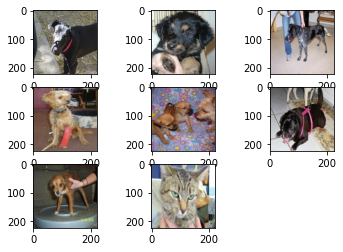

In [6]:
for x, y in train_data:
    for i in range(8):
        plt.subplot(3, 3, i+1)
        plt.imshow(x[i])
    break

In [13]:
model = Resnet_update.resnet50()

opt = optimizers.Adam(learning_rate=1e-3)
loss_func = losses.SparseCategoricalCrossentropy()
metric_func = metrics.SparseCategoricalAccuracy()

model.compile(optimizer=opt, loss=loss_func, metrics=[metric_func])

In [14]:
model.fit(train_data, validation_data=valid_data, epochs=100, verbose=1,
         callbacks=[callbacks.GetTensorboardCallback("../tensor_board/" + "layer_norm")])

Epoch 1/100
2188/2188 [==============================] - 545s 221ms/step - loss: 0.7245 - sparse_categorical_accuracy: 0.4976 - val_loss: 0.6934 - val_sparse_categorical_accuracy: 0.5109
Epoch 2/100
2188/2188 [==============================] - 552s 224ms/step - loss: 0.5684 - sparse_categorical_accuracy: 0.5058 - val_loss: 0.6194 - val_sparse_categorical_accuracy: 0.5211
Epoch 3/100
2188/2188 [==============================] - 554s 225ms/step - loss: 0.4910 - sparse_categorical_accuracy: 0.5121 - val_loss: 1.5674 - val_sparse_categorical_accuracy: 0.5138
Epoch 4/100
2188/2188 [==============================] - 553s 224ms/step - loss: 0.4028 - sparse_categorical_accuracy: 0.5209 - val_loss: 0.3694 - val_sparse_categorical_accuracy: 0.5461
Epoch 5/100
2188/2188 [==============================] - 560s 227ms/step - loss: 0.3331 - sparse_categorical_accuracy: 0.5310 - val_loss: 0.2965 - val_sparse_categorical_accuracy: 0.5498
Epoch 6/100
2188/2188 [==============================] - 565s 228

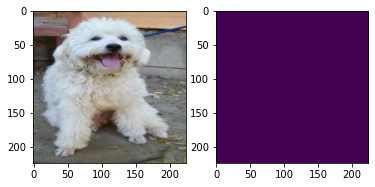

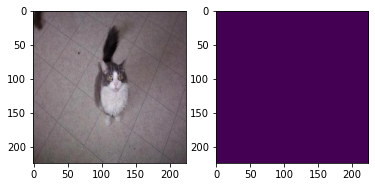

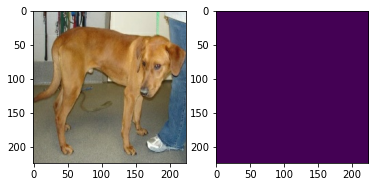

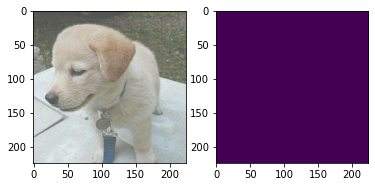

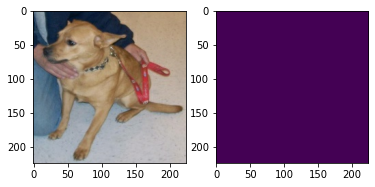

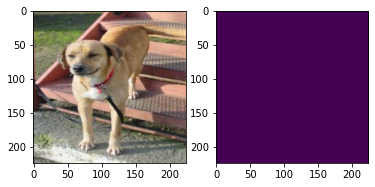

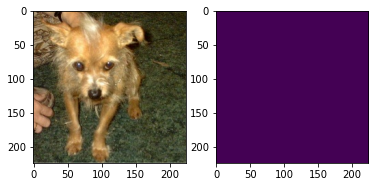

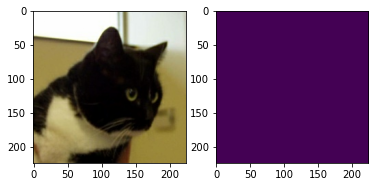

In [15]:
for x, y in train_data:
    grad_cam = BaseModel.GradCamModel(model.model).get_grad_cam(x)

    for i in range(x.shape[0]):
        plt.subplot(1, 2, 1)
        plt.imshow(x[i])

        plt.subplot(1, 2, 2)
        plt.imshow(grad_cam[i])
        plt.show()
    break